In [7]:
import pandas as pd

train = pd.read_csv("data/train.csv")
features = pd.read_csv("data/features.csv")
stores = pd.read_csv("data/stores.csv")

print(train.head())
print(train.info())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [8]:
data = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")
data = data.merge(stores, on="Store", how="left")

print(data.shape)
data.head()



(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [9]:
data.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [10]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
data[markdown_cols] = data[markdown_cols].fillna(0)


In [11]:
data.fillna(method='ffill', inplace=True)


C:\Users\ARSHATH ABDULLA A\AppData\Local\Temp\ipykernel_19344\1984096990.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [12]:
data.isnull().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)


In [14]:
data.drop(columns=['Date'], inplace=True)


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])


In [16]:
y = data['Weekly_Sales']
X = data.drop(columns=['Weekly_Sales'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_preds = lr_model.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))  # <-- manual sqrt
print("R2 Score:", r2_score(y_test, lr_preds))


Linear Regression Performance:
MAE: 14551.838364662215
RMSE: 21789.21514321594
R2 Score: 0.08955646039425236


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_preds = rf_model.predict(X_test)

print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R2 Score:", r2_score(y_test, rf_preds))


Random Forest Performance:
MAE: 1445.762189856963
RMSE: 3672.961062453518
R2 Score: 0.9741296387516187


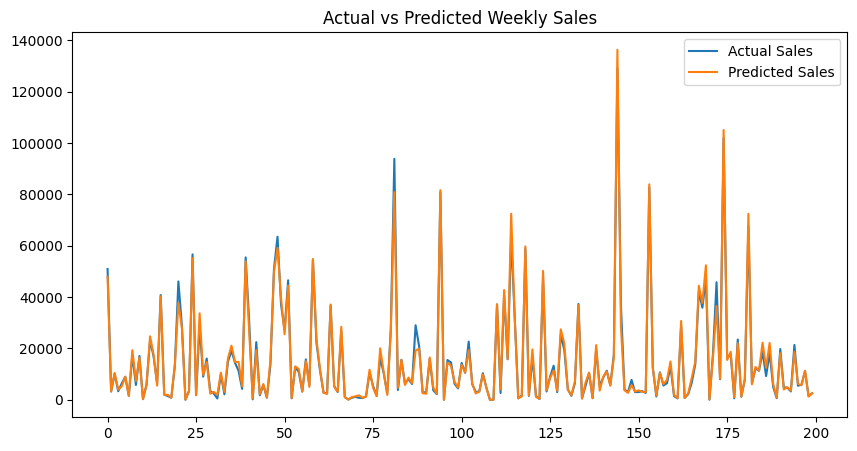

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:200], label="Actual Sales")
plt.plot(rf_preds[:200], label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Weekly Sales")
plt.show()


In [26]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


Dept            0.625085
Size            0.191837
Store           0.057141
Week            0.040521
CPI             0.026403
Type            0.014489
Unemployment    0.010889
Temperature     0.010351
Month           0.007045
Fuel_Price      0.004980
dtype: float64